# Clustering

By using *unsupervised modeling* methods we discover unknown structure in data. The central assumption of such methods is that there are subsets of similar cases in the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('../PR.mplstyle')

## K-means clustering

K-means clustering is one of the simpler and often used methods of an uncontrolled algorithm. Computational efficiency is also an important advantage. 

```
Randomly select k points - centers.
repeat
     Determines the nearest center of each point.
     Calculate new centers - the centers of the respective groups.
until centers are no longer changing.
```

Calculate the distance between the points $\vec{x} = (x_1, x_2, ... x_p)$ and $\vec{y} = (y_1, y_2, ... y_p)$ using the Euclidean distance:

 $$\|\vec{x} - \vec{y}\| = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + ... + (x_p-y_p)^2} $$

##### Question 5-1-1

What is the time complexity of the algorithm in relation to the number of cases and the number of attributes?

[Answer](205-1.ipynb#Answer-5-1-1)

### Podatki

Metodo testiramo na podatkovni zbirki <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a>, kjer za cvetlice v treh razredih merimo različne dimenzije cvetnih oz. venčnih listov. V podatkih najdemo tri gruče, približno takole. V rešitvi sta prikazana samo prva dva atributa, zato se gruče navidez prekrivajo.

<table>
<tr>
<td><img src="../slike/iris.png" width="300"></img></td> 
<td><img src="../slike/iris-resitev.png" width="300"></img></td>
</tr>
<table>


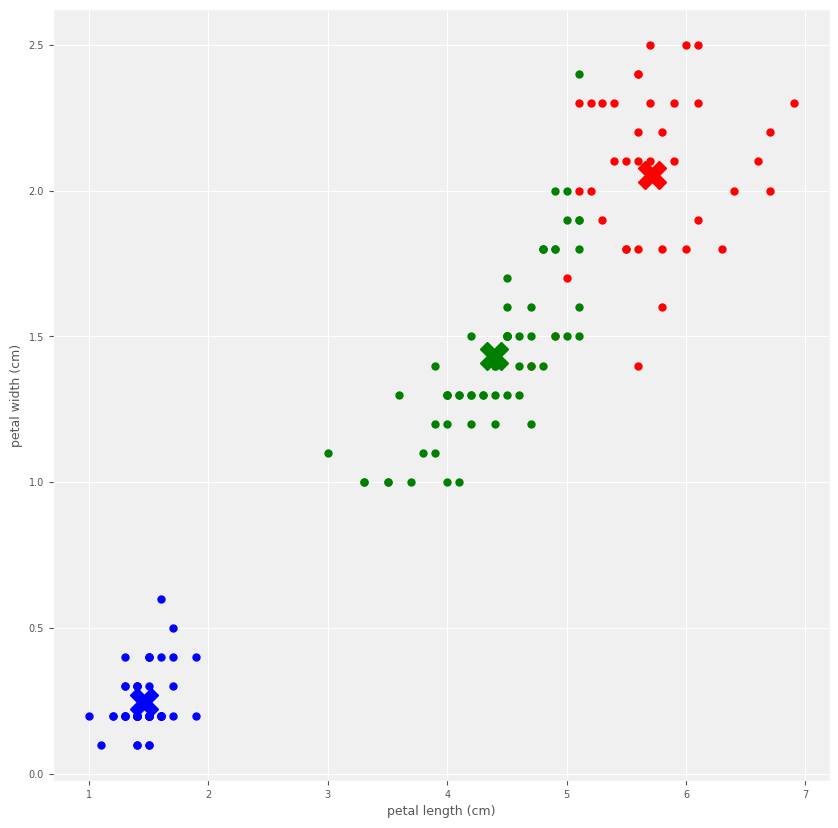

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
X = iris.data

model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

plt.figure(figsize=(10, 10))
color = {0:"red", 1:"blue", 2:"green"}
for c, x in zip(model.labels_, X):
    plt.plot(x[2], x[3], ".", color=color[c], markersize=10.0)
for i, c in enumerate(model.cluster_centers_):
    plt.plot(c[2], c[3], "X", color=color[i], markersize=20.0)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

### Evaluating the effectiveness of group discovery

Assessing the effectiveness of group discovery is one of the unresolved challenges of machine learning.
One option is if we know the real classes to which the data belongs. This is true for the iris database, where the flowers are arranged in three classes.

##### Question 5-1-2

Check how well the result of your method matches real classes? How will you measure the match? Do you encounter any problems?

[Answer](205-1.ipynb#Answer-5-1-2)

If we know the true classes, we can use methods like [Adjusted Rand Index (ARI)](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index).


ARI measures agreement between your clustering and the ground truth. So for every pair of points we check whether they end up in the same cluster in both the predicted clustering and the true labels, or are they separated in both?

It adjusts for chance groupings (so random clustering tends toward 0, not a positive score).

* +1 → perfect clustering (matches ground truth exactly)
* 0 → random labeling (no better than chance)
* Negative values → worse than random

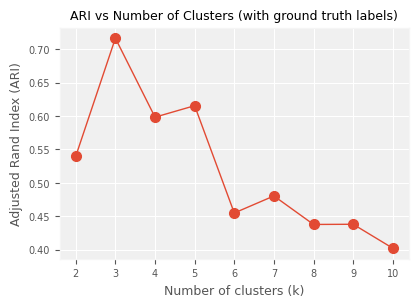

In [3]:
from sklearn.metrics import adjusted_rand_score

true_labels = iris.target
K = range(2, 11)
ari_scores = []

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = model.fit_predict(X)
    ari = adjusted_rand_score(true_labels, labels)
    ari_scores.append(ari)

plt.plot(K, ari_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("ARI vs Number of Clusters (with ground truth labels)")
plt.show()

In many real-world clustering problems, we don’t know the true labels of the data. That means we can’t use external measures like the Adjusted Rand Index.

Instead, we need internal validation methods that judge the quality of clusters using only the data itself. Two commonly used methods are:

* **Elbow method** – looks at how the total “compactness” of clusters improves as we increase the number of clusters.

* **[Silhouette score](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)** – measures how well each point fits within its own cluster compared to other clusters.

These methods don’t tell us the true number of clusters, but they help us choose a reasonable $k$ when no ground truth is available.

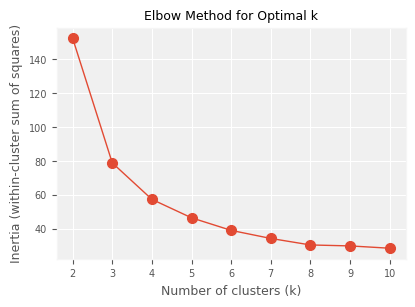

In [4]:
inertias = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init="auto")
    model.fit(X)
    inertias.append(model.inertia_)  

plt.plot(K, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

#### Silhouette coefficient

The silhouette coefficient is an unsupervised measure in the area between `-1` (wrongly assigned groups) and` 1` (very dense, well-separated groups). The greater internal density within the groups and the greater the distance are proportional with the coefficient. Even this measure does not assume that the data is in the vector space, but it depends on the selected distance.

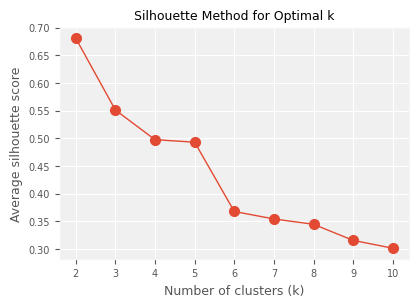

In [5]:
from sklearn.metrics import silhouette_score
silhouettes = []

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = model.fit_predict(X)
    silhouettes.append(silhouette_score(X, labels))

plt.plot(K, silhouettes, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average silhouette score")
plt.title("Silhouette Method for Optimal k")
plt.show()

##### Question 5-1-3

Test the method in the lower, synthetic data examples. How does the KMeans method work? Why?

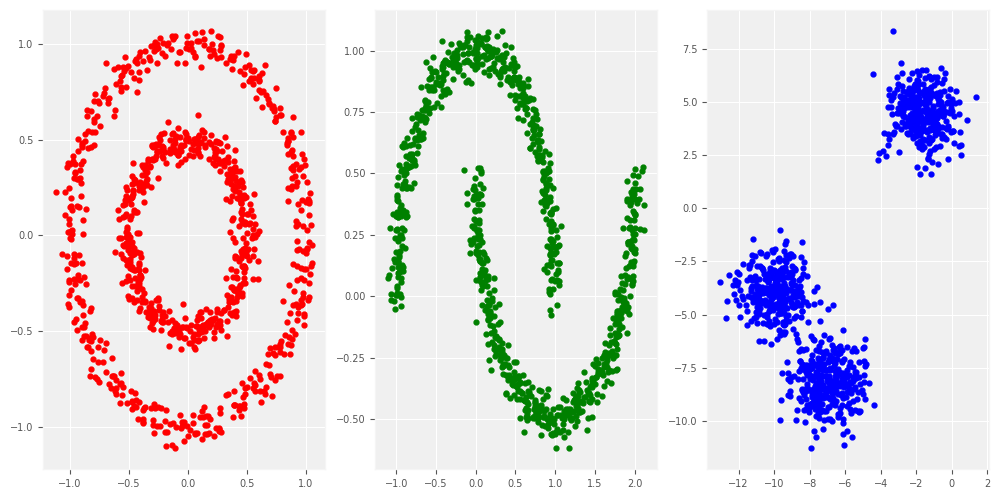

In [6]:
from sklearn.datasets import make_circles, make_blobs, make_moons

n_samples=1000
noisy_circles, _ = make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=42)
noisy_moons, _ = make_moons(n_samples=n_samples, noise=.05, random_state=42)
blobs, _ = make_blobs(n_samples=n_samples, random_state=1)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes[0].plot(noisy_circles[:, 0], noisy_circles[:, 1], "r.")
axes[1].plot(noisy_moons[:, 0], noisy_moons[:, 1], "g.")
axes[2].plot(blobs[:, 0], blobs[:, 1], "b.")

fig.tight_layout()
plt.show()

[Answer](205-1.ipynb#Answer-5-1-3)

### DBSCAN method

As we saw with the previous examples, sometimes clusters are not nice and round. When they have irregular shapes, different sizes, or noise points that don’t belong anywhere, KMeans struggles.

In these situations, we can use DBSCAN (Density-Based Spatial Clustering of Applications with Noise). This method groups together points that are densely packed, while points in sparse regions are treated as noise (they don’t belong to any cluster). Unlike KMeans, it doesn’t require the number of clusters in advance.

The key parameters are:

* eps: the maximum distance to consider two points as neighbors
* min_samples: the minimum number of neighbors a point needs to be considered a “core” point of a cluster

##### Question 5-1-4

Test the <a href="http://scikit-learn.org/stable/modules/clustering.html#dbscan">DBSCAN</a> method. Does this method work better on the same data? Why? You find the answer in the method description.

[Answer](205-1.ipynb#Answer-5-1-4)